# Notebook 4 - IGTI - Módulo 1 - Data
- Autor: Caio Gabriel de Moraes
- Data : 30/07/2020
- LinkedIn: https://www.linkedin.com/in/caio-moraes-8026a6158/

## Carregando as Bibliotecas

In [1]:
# import de avisos
import sys
import warnings
import matplotlib.cbook
warnings.simplefilter("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# import para a manipulação dos dados
import pandas as pd
import numpy as np
import scipy

# import para a visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

# import para os modelos de seleção
from sklearn.model_selection import train_test_split

# import para o modelo de classificação
from sklearn.svm import SVC

# import para as métricas
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# especificando quais nós devem ser executados interativamente
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# declarando o tamanho máximo das colunas e linhas
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

In [2]:
# versões dos pacotes usados nesse jupyter notebook
%reload_ext watermark
%watermark -a "Notebook 4 - Módulo 1 - Caio Moraes" --iversions

numpy      1.18.1
scipy      1.4.1
matplotlib 3.2.0
seaborn    0.10.1
pandas     1.0.3
Notebook 4 - Módulo 1 - Caio Moraes


## Criando as Funções

In [3]:
# função para verificar se existe valores missing
def check_missing(df, display=10):
    temp_df = df.copy()
    df_nan = round((temp_df.isnull().sum() / len(temp_df)) * 100, 2)
    df_missing = pd.DataFrame({"Missing n": temp_df.isnull().sum(), "% Missing": df_nan})
    if df_missing["Missing n"].sum() == 0:
        return print("O dataset não contém valores faltantes")
    else:
        return df_missing.sort_values("% Missing", ascending=False).head(display)
    

# função para verificar os valores únicos no dataset
def unique_values(df):
    print("-" * 40)
    for c in df.columns:
        print("Feature: {0}".format(c))
        print()
        if df[c].nunique() < 15:
            print("Valores Únicos: ")
            print(df[c].unique())
            print()
        print("Quantidade: {0}".format(df[c].nunique()))
        print()
        print("Tipo: {0}".format(df[c].dtype))
        print()
        if df[c].dtype == np.int64 or df[c].dtype == np.float64 or df[c].dtype == np.dtype("M8[ns]"):
            print("Menor Valor: {0}".format(min(df[c])))
            print("Maior Valor: {0}".format(max(df[c])))
        print("-" * 40)
        

# função para verificador anomalias com zscore
def zscore(df, colunas):
    # criando o z-score
    z = np.abs(scipy.stats.zscore(df[colunas].values))
    threshold = 2
    result = np.where(z > threshold)
    # criando o dataset com as anomalias (outliers)
    df_outlier = df.iloc[result[0]]
    
    # mostrando as informações
    print("-" * 80)
    if len(colunas) == 1:
        # mostrando qual coluna pertence
        print("Coluna: {0}".format(colunas))
        print()
    else:
        # mostrando quais colunas pertencem
        print("Colunas: {0}".format(colunas))
        print()
        # mostrando a quantidade de anomalias (outliers) total
        print("Quantidade Anomalias (Outliers) Total: {0}".format(len(df_outlier)))
        print()
    # mostrando a quantidade de anomalias (outliers) distintos
    print("Quantidade de Anomalias (Outliers) Distintas: {0}".format(df_outlier.index.nunique()))
    print()
    # mostrando os índices distintos das anomalias (outliers)
    print("Índices Distintos das Anomalias (Outliers):")
    print()
    print(list(df_outlier.index.unique()))
    if len(colunas) != 1:
        print()
        # mostrando os indices repetidos das anomalias (outliers)
        print("Índices Repetidos das Anomalias (Outliers):")
        print()
        outlier_repeat = df_outlier.index.value_counts()
        dict_outlier_repeat = dict(outlier_repeat[outlier_repeat > 1])
        index_repeat = []
        for c, v in dict_outlier_repeat.items():
            index_repeat.append(c)
        print(index_repeat)
    print("-" * 80)
    # mostrando o dataset com as anomalias
    print("Dataset com Anomalias:")
    return df_outlier.head()


# função para o gráfico de countplot
def countplot(df, coluna):
    sns.countplot(x=coluna, data=df)
    plt.title("Distribuição dos Pacientes pela Feature {0}".format(coluna))
    

# função para o grafico de histograma
def histograma(df, coluna):
    df.hist(coluna, bins=35)
    plt.title("Distribuição dos Pacientes pela feature {0}".format(coluna))
    plt.xlabel(coluna)

## Trabalhando com o Dataset

In [4]:
# carregando o dataset
df_data = pd.read_csv("data.csv", sep=",")

In [5]:
# mostrando o dataset
df_data.head()

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,pncaden,chest pain type,resting bp s,hypertension,cholesterol,smoker,cigarettes per day,years of smoking,fasting blood sugar,diabetes,family hist,resting ecg,ekg month,ekg day,ekg yr,digitalis,beta blocker,nitrates,calcium channel blocker,diuretic,exercise protocol,duration of exercise,thaltime,mets achieved,max heart rate,resting heart rate,peak exercise bp 1,peak exercise bp 2,dummy 1,resting bp d,exercise angina,xhypo,oldpeak,ST slope,ST height at rest,ST heaight at peak,flouroscopy,dummy 2,dummy 3,resting ejection fraction,rest wall motion abnormality,exercise ejection fraction,exercsie wall motion,thal,dummy 4,dummy 5,dummy 6,cath month,cath day,cath yr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
0,1254,0,40,1,1,0,0.0,NaN,2,140.0,0.0,289.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,12.0,16.0,84.0,0.0,0.0,0.0,0.0,0.0,150.0,18.0,NaN,7.0,172.0,86.0,200.0,110.0,140.0,86.0,0.0,0.0,0.0,NaN,26.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,20.0,84.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
1,1255,0,49,0,1,0,0.0,NaN,3,160.0,1.0,180.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,11.0,16.0,84.0,0.0,0.0,0.0,0.0,0.0,NaN,10.0,9.0,7.0,156.0,100.0,220.0,106.0,160.0,90.0,0.0,0.0,1.0,2.0,14.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,20.0,84.0,1,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
2,1256,0,37,1,1,0,0.0,NaN,2,130.0,0.0,283.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,11.0,21.0,84.0,0.0,0.0,0.0,0.0,0.0,100.0,10.0,NaN,5.0,98.0,58.0,180.0,100.0,130.0,80.0,0.0,0.0,0.0,NaN,17.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,26.0,84.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
3,1257,0,48,0,1,1,1.0,NaN,4,138.0,0.0,214.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,9.0,21.0,84.0,0.0,0.0,0.0,0.0,0.0,50.0,5.0,4.0,4.0,108.0,54.0,210.0,106.0,138.0,86.0,1.0,0.0,1.5,2.0,19.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,30.0,84.0,3,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name
4,1258,0,54,1,1,0,1.0,NaN,3,150.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,7.0,25.0,84.0,0.0,0.0,1.0,1.0,0.0,25.0,2.0,NaN,3.0,122.0,74.0,130.0,100.0,150.0,90.0,0.0,1.0,0.0,NaN,13.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,30.0,84.0,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,name


In [6]:
# mostrando a dimensão do dataset
df_data.shape

(617, 76)

In [7]:
# mostrando as informações do dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 76 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           617 non-null    int64  
 1   ccf                           617 non-null    int64  
 2   age                           617 non-null    int64  
 3   sex                           617 non-null    int64  
 4   pain location                 617 non-null    int64  
 5   pain w exertion               617 non-null    int64  
 6   relieved after rest           613 non-null    float64
 7   pncaden                       0 non-null      float64
 8   chest pain type               617 non-null    int64  
 9   resting bp s                  558 non-null    float64
 10  hypertension                  583 non-null    float64
 11  cholesterol                   587 non-null    float64
 12  smoker                        230 non-null    float64
 13  cigar

In [8]:
# verificando os valores unicos de cada feature
unique_values(df_data)

----------------------------------------
Feature: _id

Quantidade: 616

Tipo: int64

Menor Valor: 1
Maior Valor: 5002
----------------------------------------
Feature: ccf

Valores Únicos: 
[0]

Quantidade: 1

Tipo: int64

Menor Valor: 0
Maior Valor: 0
----------------------------------------
Feature: age

Quantidade: 50

Tipo: int64

Menor Valor: 28
Maior Valor: 77
----------------------------------------
Feature: sex

Valores Únicos: 
[1 0]

Quantidade: 2

Tipo: int64

Menor Valor: 0
Maior Valor: 1
----------------------------------------
Feature: pain location

Valores Únicos: 
[1 0]

Quantidade: 2

Tipo: int64

Menor Valor: 0
Maior Valor: 1
----------------------------------------
Feature: pain w exertion

Valores Únicos: 
[0 1]

Quantidade: 2

Tipo: int64

Menor Valor: 0
Maior Valor: 1
----------------------------------------
Feature: relieved after rest

Valores Únicos: 
[ 0.  1. nan]

Quantidade: 2

Tipo: float64

Menor Valor: 0.0
Maior Valor: 1.0
-------------------------------

### Observações
- Carregamos o dataset chamado data.csv
- É um dataset de um ficha tecnica de pacientes sem informar o nome dos paciente.
- Os dados pessoais dos pacientes são: (_id, ccf, age e sex).
- E depois informações sobre a saúde do paciente.
- São 617 registros e 76 features sendo float64(67), int64(8) e object(1).

## Análise Exploratória dos Dados

In [9]:
# mostrando a descrição do dataset
df_data.describe()

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,pncaden,chest pain type,resting bp s,hypertension,cholesterol,smoker,cigarettes per day,years of smoking,fasting blood sugar,diabetes,family hist,resting ecg,ekg month,ekg day,ekg yr,digitalis,beta blocker,nitrates,calcium channel blocker,diuretic,exercise protocol,duration of exercise,thaltime,mets achieved,max heart rate,resting heart rate,peak exercise bp 1,peak exercise bp 2,dummy 1,resting bp d,exercise angina,xhypo,oldpeak,ST slope,ST height at rest,ST heaight at peak,flouroscopy,dummy 2,dummy 3,resting ejection fraction,rest wall motion abnormality,exercise ejection fraction,exercsie wall motion,thal,dummy 4,dummy 5,dummy 6,cath month,cath day,cath yr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13
count,617.000000,617.0,617.000000,617.000000,617.000000,617.000000,613.000000,0.0,617.000000,558.000000,583.000000,587.000000,230.000000,202.000000,190.000000,527.000000,72.000000,195.000000,615.000000,564.000000,563.000000,564.000000,551.000000,553.000000,554.000000,556.000000,537.000000,505.000000,561.000000,233.000000,512.000000,562.000000,561.000000,554.000000,554.000000,558.000000,558.000000,562.000000,559.000000,555.000000,309.000000,474.000000,475.000000,11.000000,0.0,1.0,28.000000,30.000000,2.000000,5.000000,142.000000,130.000000,44.000000,1.0,606.000000,608.000000,608.000000,617.000000,342.000000,381.000000,371.000000,341.000000,382.000000,332.000000,346.000000,327.000000,372.000000,347.000000,598.000000,598.000000,598.000000,598.000000,601.000000,311.000000,119.000000
mean,1325.489465,0.0,53.055105,0.842788,0.920583,0.593193,0.672104,NaN,3.294976,132.372760,0.408233,174.579216,0.517391,22.133663,23.952632,0.176471,0.944444,0.482051,0.414634,5.758865,15.628774,84.934397,0.036298,0.256781,0.276173,0.208633,0.111732,57.229703,8.775223,6.428755,20.189648,131.042705,75.673797,173.465704,91.644404,132.372760,82.804659,0.423488,0.028623,0.790991,1.932039,14.398734,14.145263,1.545455,NaN,0.0,0.531071,1.033333,0.550000,0.200000,5.690141,1.284615,0.295455,0.0,5.993399,16.286184,84.550987,1.230146,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.470430,1.207493,1.030100,1.048495,1.132107,1.705686,1.194676,27.623119,5.869748
std,1294.916561,0.0,9.582869,0.364296,0.270607,0.491637,0.469830,NaN,0.913743,19.828097,0.491929,124.349962,0.500787,16.146930,16.428871,0.381582,0.230669,0.500964,0.611066,3.306489,8.804259,1.123440,0.187200,1.013976,0.447508,0.406697,0.315330,52.784478,4.206623,4.299778,37.762087,25.151341,15.183479,26.601875,13.464101,19.828097,10.558013,0.494551,0.166893,1.041776,0.585465,5.702942,5.697171,2.621589,NaN,NaN,0.146195,1.066200,0.070711,0.447214,1.795120,0.958314,0.461522,NaN,3.336246,8.866408,5.140596,1.263447,8.706091,0.499399,0.449764,0.402339,0.490647,0.318847,0.391167,0.250887,0.499797,0.406097,0.336148,0.503910,0.673205,1.834072,0.541946,31.675295,1.650914
min,1.000000,0.0,28.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,60.000000,37.000000,100.000000,11.000000,0.000000,0.000000,0.000000,0.000000,-2.600000,0.000000,2.000000,2.000000,0.000000,NaN,0.0,0.220000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.220000,3.300000
25%,157.000000,0.0,47.000000,1.000000,1.000000,0.000000,0.000000,NaN,3.000000,120.000000,0.000000,0.000000,0.000000,15.000000,8.500000,0.000000,1.000000,0.000000,0.000000,3.000000,8.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,6.000000,3.500000,5.000000,114.250000,65.000000,158.000000,80.000000,120.000000

- count = número de elementos (linhas) existente no banco de dados
- mean = média dos valores na coluna
- std = desvio padrão dos dados presentes na coluna
- min = menor valor existente na coluna
- 25% = primeiro quartil dos dados (25%)
- 50% = segundo quartil dos dados (50%)
- 75% = terceiro quartil dos dados (75%)
- max = valor máximo existente na coluna

In [10]:
# verificando a quantidade de features com valores nulos
nans = df_data.isnull().sum()
nans_count = nans[nans > 0].count()
nans_count

67

In [11]:
# verificando se existe valores nulos
check_missing(df_data, display=nans_count)

,Missing n,% Missing
pncaden,617,100.00
dummy 2,617,100.00
dummy 6,616,99.84
dummy 3,616,99.84
exercise ejection fraction,615,99.68
exercsie wall motion,612,99.19
flouroscopy,606,98.22
resting ejection fraction,589,95.46
rest wall motion abnormality,587,95.14
dummy 5,573,92.87


In [12]:
# substituindo os valores missing pela média de cada feature
df_data.fillna(df_data.mean(), inplace=True)

In [13]:
# verificando a quantidade de features com valores nulos
nans = df_data.isnull().sum()
nans_count = nans[nans > 0].count()
nans_count

2

In [14]:
# verificando se existe valores nulos
check_missing(df_data, display=nans_count)

,Missing n,% Missing
dummy 2,617,100.0
pncaden,617,100.0


In [15]:
colunas = ["dummy 2", "pncaden"]
df_data.drop(columns=colunas, inplace=True, axis=1)

In [16]:
# verificando a quantidade de features com valores nulos
nans = df_data.isnull().sum()
nans_count = nans[nans > 0].count()
nans_count

0

In [17]:
# verificando se existe valores nulos
check_missing(df_data)

O dataset não contém valores faltantes


In [18]:
# mostrando a dimensão do dataset
df_data.shape

(617, 74)

### Observações
- Mostramos a descrição do dataset.
- Verificamos se existia valores missing.
- Das 76 features 67 estavam com valores nulos.
- Substituimos os valores missing pela média de cada feature.
- Verificamos se existia valores missing.
- Das 76 features 2 continuaram com valores nulos.
- As features (dummy 2 e pncaden) por ser a coluna toda de valores missing, não consegui substituir pela média e manteve com os valores missing.
- Para não atrapalhar dropamos essas duas features.
- Verificamos se existia valores missing.
- Mostramos a dimensão do dataset: antes era (617, 76), depois do drop (617, 74).


## Verificando Anomalias

(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text major ticklabel objects>)

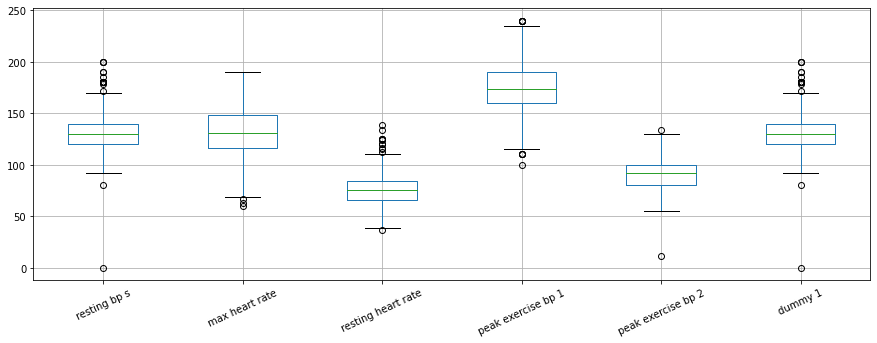

In [19]:
# declarando as features que deseja
colunas = ["resting bp s", "max heart rate", "resting heart rate", "peak exercise bp 1", "peak exercise bp 2",
           "dummy 1"]

# plotando o boxplot das features selecionadas
df_data.boxplot(column=colunas, figsize=(15, 5))
plt.xticks(rotation=25)

In [20]:
# z-score para todas features selecionadas
zscore(df_data, colunas)

--------------------------------------------------------------------------------
Colunas: ['resting bp s', 'max heart rate', 'resting heart rate', 'peak exercise bp 1', 'peak exercise bp 2', 'dummy 1']

Quantidade Anomalias (Outliers) Total: 163

Quantidade de Anomalias (Outliers) Distintas: 114

Índices Distintos das Anomalias (Outliers):

[30, 35, 42, 48, 60, 61, 67, 68, 69, 70, 75, 83, 86, 88, 93, 94, 96, 97, 101, 105, 107, 109, 112, 118, 119, 120, 123, 124, 126, 129, 130, 131, 135, 164, 170, 172, 176, 178, 187, 190, 191, 192, 195, 196, 204, 207, 209, 212, 214, 216, 219, 224, 228, 230, 233, 242, 243, 254, 256, 264, 275, 276, 277, 279, 285, 290, 299, 301, 310, 315, 319, 321, 326, 329, 331, 332, 333, 344, 361, 366, 371, 373, 376, 389, 391, 400, 402, 403, 408, 409, 411, 412, 421, 424, 441, 448, 450, 457, 460, 465, 466, 476, 487, 496, 497, 500, 508, 514, 538, 548, 551, 583, 586, 593]

Índices Repetidos das Anomalias (Outliers):

[275, 403, 400, 408, 551, 424, 487, 254, 126, 48, 450, 191

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,chest pain type,resting bp s,hypertension,cholesterol,smoker,cigarettes per day,years of smoking,fasting blood sugar,diabetes,family hist,resting ecg,ekg month,ekg day,ekg yr,digitalis,beta blocker,nitrates,calcium channel blocker,diuretic,exercise protocol,duration of exercise,thaltime,mets achieved,max heart rate,resting heart rate,peak exercise bp 1,peak exercise bp 2,dummy 1,resting bp d,exercise angina,xhypo,oldpeak,ST slope,ST height at rest,ST heaight at peak,flouroscopy,dummy 3,resting ejection fraction,rest wall motion abnormality,exercise ejection fraction,exercsie wall motion,thal,dummy 4,dummy 5,dummy 6,cath month,cath day,cath yr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
30,1284,0,53,1,1,1,0.0,3,145.0,1.0,518.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,6.0,2.0,87.0,0.0,0.256781,1.0,1.0,0.0,125.0,15.0,6.428755,7.0,130.0,64.0,230.0,115.0,145.0,90.0,0.0,0.0,0.0,1.932039,15.0,12.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,5.0,30.0,87.0,3,1.555556,2.000000,1.280323,1.202346,2.000000,1.114458,2.000000,1.067278,2.00000,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
35,1289,0,32,1,1,0,0.0,2,125.0,0.0,254.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,5.0,8.0,87.0,0.0,0.000000,0.0,0.0,0.0,150.0,16.5,6.428755,9.0,155.0,75.0,230.0,90.0,125.0,80.0,0.0,0.0,0.0,1.932039,15.0,15.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,5.0,10.0,87.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
42,1296,0,35,1,1,0,0.0,2,150.0,0.0,264.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,3.0,2.0,87.0,0.0,0.000000,0.0,0.0,0.0,125.0,14.0,6.428755,7.0,168.0,85.0,230.0,120.0,150.0,80.0,0.0,0.0,0.0,1.932039,18.0,15.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,3.0,5.0,87.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
42,1296,0,35,1,1,0,0.0,2,150.0,0.0,264.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,3.0,2.0,87.0,0.0,0.000000,0.0,0.0,0.0,125.0,14.0,6.428755,7.0,168.0,85.0,230.0,120.0,150.0,80.0,0.0,0.0,0.0,1.932039,18.0,15.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,3.0,5.0,87.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
48,1302,0,36,1,1,0,0.0,3,112.0,0.0,340.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,10.0,5.0,84.0,0.0,0.000000,0.0,0.0,0.0,75.0,7.0,6.500000,4.0,184.0,134.0,150.0,82.0,112.0,70.0,0.0,0.0,1.0,2.000000,24.0,28.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,3.000000,0.000000,0.000000,0.0,10.0,10.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.000000,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name


In [21]:
# z-score para a feature resting bp s
coluna = ["resting bp s"]
zscore(df_data, coluna)

--------------------------------------------------------------------------------
Coluna: ['resting bp s']

Quantidade de Anomalias (Outliers) Distintas: 20

Índices Distintos das Anomalias (Outliers):

[109, 123, 190, 191, 228, 242, 275, 276, 279, 315, 366, 373, 400, 412, 424, 450, 476, 551, 586, 593]
--------------------------------------------------------------------------------
Dataset com Anomalias:


,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,chest pain type,resting bp s,hypertension,cholesterol,smoker,cigarettes per day,years of smoking,fasting blood sugar,diabetes,family hist,resting ecg,ekg month,ekg day,ekg yr,digitalis,beta blocker,nitrates,calcium channel blocker,diuretic,exercise protocol,duration of exercise,thaltime,mets achieved,max heart rate,resting heart rate,peak exercise bp 1,peak exercise bp 2,dummy 1,resting bp d,exercise angina,xhypo,oldpeak,ST slope,ST height at rest,ST heaight at peak,flouroscopy,dummy 3,resting ejection fraction,rest wall motion abnormality,exercise ejection fraction,exercsie wall motion,thal,dummy 4,dummy 5,dummy 6,cath month,cath day,cath yr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
109,1235,0,39,1,1,0,0.0,2,190.0,0.0,241.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,4.0,28.0,84.0,0.0,0.0,0.0,0.0,0.0,50.0,6.0,6.428755,2.0,106.0,90.0,190.0,100.0,190.0,100.0,0.0,0.0,0.0,1.932039,18.000000,18.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,4.0,30.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
123,1249,0,58,0,1,0,0.0,2,180.0,0.0,393.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,6.0,10.0,86.0,0.0,0.0,0.0,0.0,0.0,75.0,7.0,5.500000,6.0,110.0,78.0,220.0,110.0,180.0,90.0,1.0,0.0,1.0,2.000000,14.398734,6.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,7.000000,1.000000,0.000000,0.0,7.0,1.0,86.0,4,2.000000,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,2.00000,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
190,1064,0,53,1,1,1,1.0,4,180.0,1.0,285.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,1.0,5.0,24.0,85.0,0.0,0.0,0.0,0.0,0.0,75.0,9.0,7.500000,5.0,120.0,67.0,210.0,108.0,180.0,100.0,1.0,0.0,1.5,2.000000,15.000000,15.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,5.0,30.0,85.0,3,1.555556,2.000000,1.280323,1.202346,1.400524,1.114458,2.000000,1.067278,2.00000,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
191,1065,0,46,1,1,1,1.0,4,180.0,1.0,280.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,1.0,5.0,21.0,85.0,0.0,0.0,0.0,0.0,0.0,100.0,11.0,6.428755,5.0,120.0,67.0,210.0,108.0,180.0,100.0,0.0,0.0,0.0,1.932039,17.000000,13.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,5.0,26.0,85.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.000000,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
228,1104,0,38,1,1,1,1.0,4,92.0,1.0,117.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,8.0,30.0,84.0,0.0,0.0,0.0,0.0,0.0,75.0,7.0,6.000000,5.0,134.0,75.0,150.0,80.0,92.0,70.0,1.0,0.0,2.5,2.000000,22.000000,20.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,9.0,5.0,84.0,1,1.000000,2.000000,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name


In [22]:
# z-score para a feature max heart rate
coluna = ["max heart rate"]
zscore(df_data, coluna)

--------------------------------------------------------------------------------
Coluna: ['max heart rate']

Quantidade de Anomalias (Outliers) Distintas: 33

Índices Distintos das Anomalias (Outliers):

[48, 67, 68, 94, 118, 119, 126, 172, 195, 207, 209, 224, 230, 275, 290, 310, 319, 329, 332, 361, 371, 389, 391, 400, 403, 408, 411, 441, 457, 487, 497, 508, 551]
--------------------------------------------------------------------------------
Dataset com Anomalias:


,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,chest pain type,resting bp s,hypertension,cholesterol,smoker,cigarettes per day,years of smoking,fasting blood sugar,diabetes,family hist,resting ecg,ekg month,ekg day,ekg yr,digitalis,beta blocker,nitrates,calcium channel blocker,diuretic,exercise protocol,duration of exercise,thaltime,mets achieved,max heart rate,resting heart rate,peak exercise bp 1,peak exercise bp 2,dummy 1,resting bp d,exercise angina,xhypo,oldpeak,ST slope,ST height at rest,ST heaight at peak,flouroscopy,dummy 3,resting ejection fraction,rest wall motion abnormality,exercise ejection fraction,exercsie wall motion,thal,dummy 4,dummy 5,dummy 6,cath month,cath day,cath yr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
48,1302,0,36,1,1,0,0.0,3,112.0,0.0,340.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,10.0,5.0,84.0,0.0,0.0,0.0,0.0,0.0,75.0,7.0,6.500000,4.0,184.0,134.0,150.0,82.0,112.0,70.0,0.0,0.0,1.0,2.000000,24.0,28.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,3.000000,0.000000,0.000000,0.0,10.0,10.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.000000,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
67,1193,0,32,1,1,0,0.0,2,110.0,0.0,225.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,12.0,10.0,84.0,0.0,0.0,0.0,0.0,0.0,100.0,12.0,6.428755,5.0,184.0,120.0,170.0,84.0,110.0,70.0,0.0,0.0,0.0,1.932039,19.0,17.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,12.0,14.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
68,1194,0,52,1,1,1,1.0,4,160.0,1.0,246.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,1.0,3.0,30.0,84.0,0.0,0.0,0.0,0.0,0.0,25.0,2.0,1.000000,2.0,82.0,60.0,160.0,80.0,160.0,80.0,1.0,0.0,4.0,2.000000,10.0,10.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,10.0,2.0,84.0,3,1.555556,2.000000,1.280323,1.202346,2.000000,1.114458,2.000000,1.067278,2.00000,2.000000,1.0,1.0,1.0,3.0,1.0,27.623119,5.869748,name
94,1220,0,39,0,1,0,1.0,3,110.0,0.0,182.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,1.0,4.0,11.0,85.0,0.0,0.0,0.0,0.0,0.0,75.0,9.0,6.428755,6.0,180.0,100.0,140.0,80.0,110.0,70.0,0.0,0.0,0.0,1.932039,10.0,8.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,4.0,16.0,85.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
118,1244,0,35,0,0,0,0.0,1,120.0,0.0,160.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,1.0,6.0,10.0,85.0,0.0,0.0,0.0,0.0,0.0,75.0,8.0,6.428755,6.0,185.0,110.0,160.0,90.0,120.0,80.0,0.0,0.0,0.0,1.932039,18.0,15.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,6.0,16.0,85.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name


In [23]:
# z-score para a feature resting heart rate
coluna = ["resting heart rate"]
zscore(df_data, coluna)

--------------------------------------------------------------------------------
Coluna: ['resting heart rate']

Quantidade de Anomalias (Outliers) Distintas: 26

Índices Distintos das Anomalias (Outliers):

[48, 60, 61, 67, 97, 101, 112, 118, 120, 126, 135, 170, 178, 212, 214, 216, 219, 256, 275, 285, 371, 402, 403, 408, 487, 583]
--------------------------------------------------------------------------------
Dataset com Anomalias:


,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,chest pain type,resting bp s,hypertension,cholesterol,smoker,cigarettes per day,years of smoking,fasting blood sugar,diabetes,family hist,resting ecg,ekg month,ekg day,ekg yr,digitalis,beta blocker,nitrates,calcium channel blocker,diuretic,exercise protocol,duration of exercise,thaltime,mets achieved,max heart rate,resting heart rate,peak exercise bp 1,peak exercise bp 2,dummy 1,resting bp d,exercise angina,xhypo,oldpeak,ST slope,ST height at rest,ST heaight at peak,flouroscopy,dummy 3,resting ejection fraction,rest wall motion abnormality,exercise ejection fraction,exercsie wall motion,thal,dummy 4,dummy 5,dummy 6,cath month,cath day,cath yr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
48,1302,0,36,1,1,0,0.0,3,112.0,0.0,340.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,10.0,5.0,84.0,0.0,0.0,0.0,0.0,0.0,75.000000,7.0,6.500000,4.0,184.0,134.0,150.0,82.0,112.0,70.0,0.0,0.0,1.0,2.000000,24.0,28.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,3.000000,0.000000,0.000000,0.0,10.0,10.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.000000,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
60,1186,0,49,1,1,0,0.0,2,100.0,0.0,253.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,8.0,14.0,84.0,0.0,0.0,0.0,0.0,0.0,57.229703,11.0,6.428755,6.0,174.0,116.0,160.0,80.0,100.0,70.0,0.0,0.0,0.0,1.932039,4.0,4.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,8.0,14.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
61,1187,0,43,0,1,0,0.0,3,150.0,1.0,174.579216,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,7.0,3.0,86.0,0.0,0.0,0.0,0.0,0.0,75.000000,7.0,6.428755,5.0,175.0,105.0,240.0,110.0,150.0,90.0,0.0,0.0,0.0,1.932039,21.0,20.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,3.000000,1.284615,0.295455,0.0,7.0,6.0,86.0,0,1.555556,1.000000,1.000000,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
67,1193,0,32,1,1,0,0.0,2,110.0,0.0,225.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,12.0,10.0,84.0,0.0,0.0,0.0,0.0,0.0,100.000000,12.0,6.428755,5.0,184.0,120.0,170.0,84.0,110.0,70.0,0.0,0.0,0.0,1.932039,19.0,17.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,12.0,14.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
97,1223,0,39,1,1,1,0.0,3,160.0,1.0,147.000000,0.517391,22.133663,23.952632,1.0,1.000000,0.482051,0.0,9.0,29.0,86.0,0.0,0.0,0.0,0.0,0.0,100.000000,12.0,6.428755,6.0,160.0,120.0,200.0,116.0,160.0,100.0,0.0,0.0,0.0,1.932039,5.0,8.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,9.0,30.0,86.0,0,1.555556,1.464567,1.000000,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name


In [24]:
# z-score para a feature peak exercise bp 1
coluna = ["peak exercise bp 1"]
zscore(df_data, coluna)

--------------------------------------------------------------------------------
Coluna: ['peak exercise bp 1']

Quantidade de Anomalias (Outliers) Distintas: 33

Índices Distintos das Anomalias (Outliers):

[30, 35, 42, 61, 69, 83, 86, 88, 96, 105, 124, 129, 130, 176, 196, 204, 254, 264, 275, 285, 301, 321, 344, 403, 408, 409, 411, 448, 460, 465, 466, 500, 514]
--------------------------------------------------------------------------------
Dataset com Anomalias:


,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,chest pain type,resting bp s,hypertension,cholesterol,smoker,cigarettes per day,years of smoking,fasting blood sugar,diabetes,family hist,resting ecg,ekg month,ekg day,ekg yr,digitalis,beta blocker,nitrates,calcium channel blocker,diuretic,exercise protocol,duration of exercise,thaltime,mets achieved,max heart rate,resting heart rate,peak exercise bp 1,peak exercise bp 2,dummy 1,resting bp d,exercise angina,xhypo,oldpeak,ST slope,ST height at rest,ST heaight at peak,flouroscopy,dummy 3,resting ejection fraction,rest wall motion abnormality,exercise ejection fraction,exercsie wall motion,thal,dummy 4,dummy 5,dummy 6,cath month,cath day,cath yr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
30,1284,0,53,1,1,1,0.0,3,145.0,1.0,518.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,6.0,2.0,87.0,0.0,0.256781,1.0,1.0,0.0,125.0,15.0,6.428755,7.0,130.0,64.0,230.0,115.0,145.0,90.0,0.0,0.0,0.0,1.932039,15.0,12.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,5.0,30.0,87.0,3,1.555556,2.000000,1.280323,1.202346,2.000000,1.114458,2.000000,1.067278,2.00000,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
35,1289,0,32,1,1,0,0.0,2,125.0,0.0,254.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,5.0,8.0,87.0,0.0,0.000000,0.0,0.0,0.0,150.0,16.5,6.428755,9.0,155.0,75.0,230.0,90.0,125.0,80.0,0.0,0.0,0.0,1.932039,15.0,15.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,5.0,10.0,87.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
42,1296,0,35,1,1,0,0.0,2,150.0,0.0,264.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,3.0,2.0,87.0,0.0,0.000000,0.0,0.0,0.0,125.0,14.0,6.428755,7.0,168.0,85.0,230.0,120.0,150.0,80.0,0.0,0.0,0.0,1.932039,18.0,15.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,3.0,5.0,87.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
61,1187,0,43,0,1,0,0.0,3,150.0,1.0,174.579216,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,7.0,3.0,86.0,0.0,0.000000,0.0,0.0,0.0,75.0,7.0,6.428755,5.0,175.0,105.0,240.0,110.0,150.0,90.0,0.0,0.0,0.0,1.932039,21.0,20.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,3.000000,1.284615,0.295455,0.0,7.0,6.0,86.0,0,1.555556,1.000000,1.000000,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
69,1195,0,44,1,1,1,1.0,4,150.0,1.0,412.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,3.0,25.0,85.0,0.0,0.000000,0.0,0.0,0.0,50.0,6.0,6.428755,4.0,170.0,90.0,230.0,110.0,150.0,100.0,0.0,0.0,0.0,1.932039,5.0,5.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,3.0,28.0,85.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name


In [25]:
# z-score para a feature peak exercise bp 2
coluna = ["peak exercise bp 2"]
zscore(df_data, coluna)

--------------------------------------------------------------------------------
Coluna: ['peak exercise bp 2']

Quantidade de Anomalias (Outliers) Distintas: 31

Índices Distintos das Anomalias (Outliers):

[42, 70, 75, 86, 88, 93, 107, 130, 131, 164, 172, 187, 192, 233, 243, 254, 264, 277, 299, 326, 331, 333, 376, 421, 424, 448, 487, 496, 538, 548, 583]
--------------------------------------------------------------------------------
Dataset com Anomalias:


,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,chest pain type,resting bp s,hypertension,cholesterol,smoker,cigarettes per day,years of smoking,fasting blood sugar,diabetes,family hist,resting ecg,ekg month,ekg day,ekg yr,digitalis,beta blocker,nitrates,calcium channel blocker,diuretic,exercise protocol,duration of exercise,thaltime,mets achieved,max heart rate,resting heart rate,peak exercise bp 1,peak exercise bp 2,dummy 1,resting bp d,exercise angina,xhypo,oldpeak,ST slope,ST height at rest,ST heaight at peak,flouroscopy,dummy 3,resting ejection fraction,rest wall motion abnormality,exercise ejection fraction,exercsie wall motion,thal,dummy 4,dummy 5,dummy 6,cath month,cath day,cath yr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
42,1296,0,35,1,1,0,0.0,2,150.0,0.0,264.0,0.517391,22.133663,23.952632,0.000000,0.944444,0.482051,0.0,3.0,2.0,87.0,0.0,0.0,0.0,0.0,0.0,125.0,14.0,6.428755,7.0,168.0,85.0,230.0,120.0,150.0,80.0,0.0,0.0,0.0,1.932039,18.0,15.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,3.0,5.0,87.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
70,1196,0,57,1,1,0,0.0,2,140.0,0.0,265.0,0.517391,22.133663,23.952632,0.000000,0.944444,0.482051,1.0,7.0,24.0,86.0,0.0,0.0,0.0,0.0,0.0,50.0,6.0,5.000000,3.0,145.0,88.0,220.0,130.0,140.0,90.0,1.0,0.0,1.0,2.000000,7.0,8.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,7.0,30.0,86.0,1,1.555556,1.464567,1.280323,1.202346,2.000000,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
75,1201,0,46,1,1,0,1.0,3,150.0,1.0,163.0,0.517391,22.133663,23.952632,0.176471,0.944444,0.482051,0.0,1.0,25.0,84.0,0.0,0.0,0.0,0.0,0.0,25.0,2.0,6.428755,2.0,116.0,92.0,170.0,130.0,150.0,100.0,0.0,0.0,0.0,1.932039,21.0,25.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,1.0,30.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
86,1212,0,65,1,1,1,1.0,4,170.0,1.0,263.0,0.517391,22.133663,23.952632,1.000000,1.000000,0.482051,0.0,1.0,17.0,86.0,0.0,0.0,0.0,0.0,0.0,50.0,4.0,3.000000,5.0,112.0,72.0,230.0,120.0,170.0,90.0,1.0,0.0,2.0,2.000000,8.0,9.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,1.0,20.0,86.0,3,1.555556,2.000000,1.280323,1.202346,2.000000,1.114458,1.187861,1.067278,1.47043,2.000000,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
88,1214,0,43,1,0,0,0.0,1,120.0,0.0,291.0,0.517391,22.133663,23.952632,0.000000,0.944444,0.482051,1.0,7.0,11.0,86.0,0.0,0.0,0.0,0.0,0.0,125.0,13.0,6.428755,7.0,155.0,80.0,230.0,120.0,120.0,80.0,0.0,0.0,0.0,1.932039,17.0,15.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,7.0,12.0,86.0,2,1.555556,1.464567,2.000000,1.202346,2.000000,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,2.0,44.000000,5.869748,name


In [26]:
# z-score para a feature dummy 1
coluna = ["dummy 1"]
zscore(df_data, coluna)

--------------------------------------------------------------------------------
Coluna: ['dummy 1']

Quantidade de Anomalias (Outliers) Distintas: 20

Índices Distintos das Anomalias (Outliers):

[109, 123, 190, 191, 228, 242, 275, 276, 279, 315, 366, 373, 400, 412, 424, 450, 476, 551, 586, 593]
--------------------------------------------------------------------------------
Dataset com Anomalias:


,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,chest pain type,resting bp s,hypertension,cholesterol,smoker,cigarettes per day,years of smoking,fasting blood sugar,diabetes,family hist,resting ecg,ekg month,ekg day,ekg yr,digitalis,beta blocker,nitrates,calcium channel blocker,diuretic,exercise protocol,duration of exercise,thaltime,mets achieved,max heart rate,resting heart rate,peak exercise bp 1,peak exercise bp 2,dummy 1,resting bp d,exercise angina,xhypo,oldpeak,ST slope,ST height at rest,ST heaight at peak,flouroscopy,dummy 3,resting ejection fraction,rest wall motion abnormality,exercise ejection fraction,exercsie wall motion,thal,dummy 4,dummy 5,dummy 6,cath month,cath day,cath yr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
109,1235,0,39,1,1,0,0.0,2,190.0,0.0,241.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,4.0,28.0,84.0,0.0,0.0,0.0,0.0,0.0,50.0,6.0,6.428755,2.0,106.0,90.0,190.0,100.0,190.0,100.0,0.0,0.0,0.0,1.932039,18.000000,18.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,4.0,30.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
123,1249,0,58,0,1,0,0.0,2,180.0,0.0,393.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,6.0,10.0,86.0,0.0,0.0,0.0,0.0,0.0,75.0,7.0,5.500000,6.0,110.0,78.0,220.0,110.0,180.0,90.0,1.0,0.0,1.0,2.000000,14.398734,6.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,7.000000,1.000000,0.000000,0.0,7.0,1.0,86.0,4,2.000000,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,2.00000,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
190,1064,0,53,1,1,1,1.0,4,180.0,1.0,285.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,1.0,5.0,24.0,85.0,0.0,0.0,0.0,0.0,0.0,75.0,9.0,7.500000,5.0,120.0,67.0,210.0,108.0,180.0,100.0,1.0,0.0,1.5,2.000000,15.000000,15.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,5.0,30.0,85.0,3,1.555556,2.000000,1.280323,1.202346,1.400524,1.114458,2.000000,1.067278,2.00000,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
191,1065,0,46,1,1,1,1.0,4,180.0,1.0,280.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,1.0,5.0,21.0,85.0,0.0,0.0,0.0,0.0,0.0,100.0,11.0,6.428755,5.0,120.0,67.0,210.0,108.0,180.0,100.0,0.0,0.0,0.0,1.932039,17.000000,13.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,5.0,26.0,85.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.000000,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
228,1104,0,38,1,1,1,1.0,4,92.0,1.0,117.0,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,8.0,30.0,84.0,0.0,0.0,0.0,0.0,0.0,75.0,7.0,6.000000,5.0,134.0,75.0,150.0,80.0,92.0,70.0,1.0,0.0,2.5,2.000000,22.000000,20.0,1.545455,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,9.0,5.0,84.0,1,1.000000,2.000000,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name


### Observações
- Verificamos se existe anomalias (outliers) em 6 features diferentes ("resting bp s", "max heart rate", "resting heart rate", "peak exercise bp 1", "peak exercise bp 2", "dummy 1").
- Temos 20 anomalias (outliers) para a feature resting bp s.
- Temos 33 anomalias (outliers) para a feature max heart rate.
- Temos 26 anomalias (outliers) para a feature resting heart rate.
- Temos 33 anomalias (outliers) para a feature peak exercise bp 1.
- Temos 31 anomalias (outliers) para a feature peak exercise bp 2.
- Temos 20 anomalias (outliers) para a feature dummy 1.
- temos 114 anomalias (outliers) ao total do dataset.
- Índices das anomalias (outliers): (30, 35, 42, 48, 60, 61, 67, 68, 69, 70, 75, 83, 86, 88, 93, 94, 96, 97, 101, 105, 107, 109, 112, 118, 119, 120, 123, 124, 126, 129, 130, 131, 135, 164, 170, 172, 176, 178, 187, 190, 191, 192, 195, 196, 204, 207, 209, 212, 214, 216, 219, 224, 228, 230, 233, 242, 243, 254, 256, 264, 275, 276, 277, 279, 285, 290, 299, 301, 310, 315, 319, 321, 326, 329, 331, 332, 333, 344, 361, 366, 371, 373, 376, 389, 391, 400, 402, 403, 408, 409, 411, 412, 421, 424, 441, 448, 450, 457, 460, 465, 466, 476, 487, 496, 497, 500, 508, 514, 538, 548, 551, 583, 586, 593).
- Alguns registros se repetem nas features: (275, 403, 400, 408, 551, 424, 487, 254, 126, 48, 450, 191, 190, 315, 172, 61, 593, 130, 86, 67, 412, 411, 123, 88, 586, 476, 448, 264, 242, 276, 279, 42, 109, 228, 285, 366, 371, 373, 118, 583).
- Alguns registros se repetem em mais de uma feature.

## Explorando os Dados

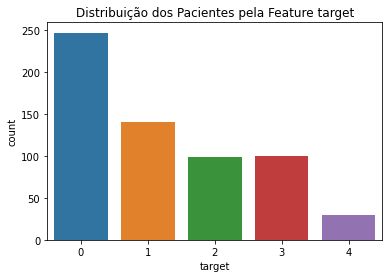

In [27]:
# analisando a distribuição de pacientes pela feature target com countplot
countplot(df_data, "target")

In [28]:
# verificando a quantidade de targets
df_data["target"].value_counts()

0    247
1    141
3    100
2     99
4     30
Name: target, dtype: int64

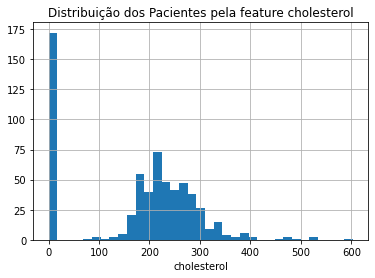

In [29]:
# analisando a distribuição dos pacientes pela feature cholesterol com hsitograma
histograma(df_data, "cholesterol")

In [30]:
# verificando a quantidade da feature cholesterol
df_data["cholesterol"].value_counts().head(10)

0.000000      172
174.579216     30
220.000000      7
216.000000      7
223.000000      6
260.000000      6
230.000000      6
219.000000      6
214.000000      5
275.000000      5
Name: cholesterol, dtype: int64

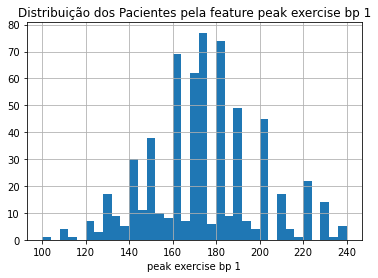

In [31]:
# analisando a distribuição dos pacientes pela feature peak exercise bp 1 com histograma
histograma(df_data, "peak exercise bp 1")

In [32]:
# verificando a quantidade de valores na feature peak exercise bp 1
df_data["peak exercise bp 1"].value_counts().head(10)

180.000000    70
160.000000    67
173.465704    63
170.000000    60
190.000000    48
200.000000    44
150.000000    36
140.000000    28
220.000000    22
210.000000    16
Name: peak exercise bp 1, dtype: int64

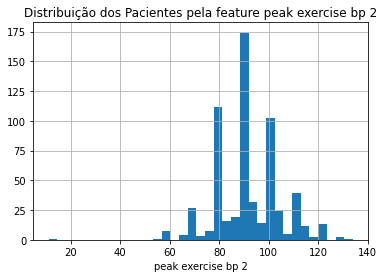

In [33]:
# analisando a distribuição dos pacientes pela feature peak exercise bp 2 com histograma
histograma(df_data, "peak exercise bp 2")

In [34]:
# verificando a quantidade de valores na feature peak exercise bp 2
df_data["peak exercise bp 2"].value_counts().head(10)

90.000000     111
80.000000     109
100.000000    101
91.644404      63
110.000000     38
70.000000      26
95.000000      24
85.000000      15
105.000000     13
120.000000     13
Name: peak exercise bp 2, dtype: int64

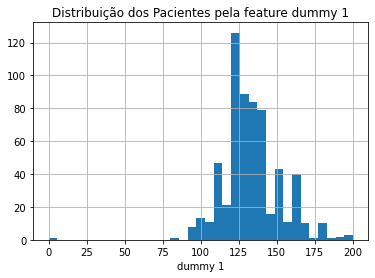

In [35]:
# analisando a distribuição dos pacientes pela feature dummy 1 com histograma
histograma(df_data, "dummy 1")

In [36]:
# verificando a quantidade da feature dummy 1
df_data["dummy 1"].value_counts().head(10)

120.00000    94
130.00000    79
140.00000    70
132.37276    59
110.00000    40
160.00000    39
150.00000    39
125.00000    18
115.00000    16
135.00000    12
Name: dummy 1, dtype: int64

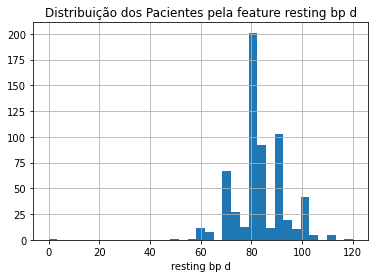

In [37]:
# analisando a distribuição dos pacientes pela feature resting bp d com histograma
histograma(df_data, "resting bp d")

In [38]:
# verificando a quantidade da feature resting bp d
df_data["resting bp d"].value_counts().head(10)

80.000000     194
90.000000     100
70.000000      67
82.804659      59
100.000000     42
85.000000      25
75.000000      16
95.000000      13
78.000000      12
60.000000      11
Name: resting bp d, dtype: int64

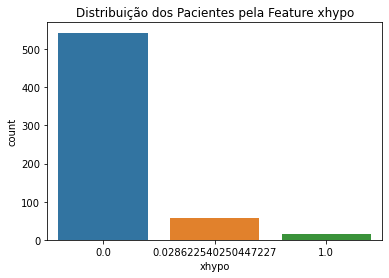

In [39]:
# analisando a distribuição dos pacientes pela idade com countplot
countplot(df_data, "xhypo")

In [40]:
# verificando a quantidade da feature xhypo
df_data["xhypo"].value_counts()

0.000000    543
0.028623     58
1.000000     16
Name: xhypo, dtype: int64

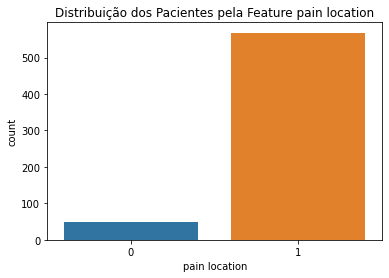

In [41]:
# analisando a distribuição dos pacientes pela feature pain location com countplot
countplot(df_data, "pain location")

In [42]:
# verificando a quantidade da feature pain location
df_data["pain location"].value_counts()

1    568
0     49
Name: pain location, dtype: int64

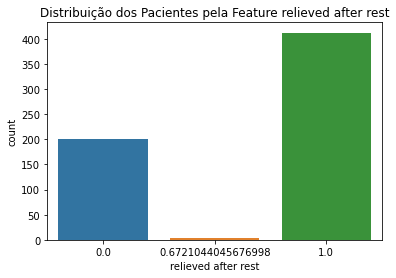

In [43]:
# analisando a distribuição dos pacientes pela feature relieved after rest com countplot
countplot(df_data, "relieved after rest")

In [44]:
# verificando a quantidade da feature relieved after rest
df_data["relieved after rest"].value_counts()

1.000000    412
0.000000    201
0.672104      4
Name: relieved after rest, dtype: int64

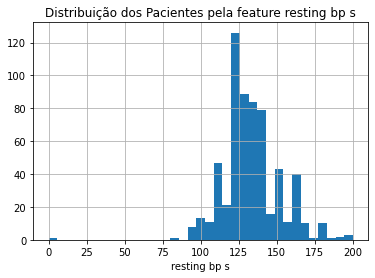

In [45]:
# analisando a distribuição dos pacientes pela feature resting bp s com histograma
histograma(df_data, "resting bp s")

In [46]:
# verificando a quantidade da feature resting bp s
df_data["resting bp s"].value_counts().head(10)

120.00000    94
130.00000    79
140.00000    70
132.37276    59
110.00000    40
160.00000    39
150.00000    39
125.00000    18
115.00000    16
135.00000    12
Name: resting bp s, dtype: int64

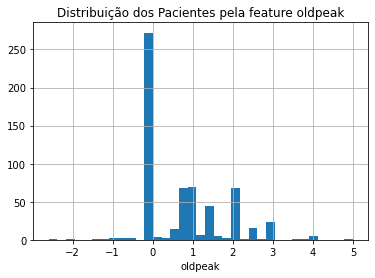

In [47]:
# analisando a distribuição dos pacientes pela feature oldpeak com histograma
histograma(df_data, "oldpeak")

In [48]:
# verificando a quantidade da feature oldpeak
df_data["oldpeak"].value_counts().head(10)

0.000000    271
1.000000     69
2.000000     67
0.790991     62
1.500000     43
3.000000     23
2.500000     14
0.500000     14
4.000000      5
0.700000      4
Name: oldpeak, dtype: int64

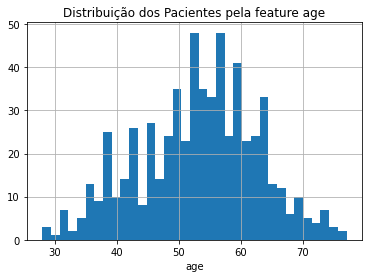

In [49]:
# analisando a distribuição dos pacientes pela idade com histograma
histograma(df_data, "age")

In [50]:
# verificando a quantidade de idades
df_data["age"].value_counts().head(10)

54    35
55    33
56    27
53    25
62    24
48    24
58    24
51    23
61    23
52    23
Name: age, dtype: int64

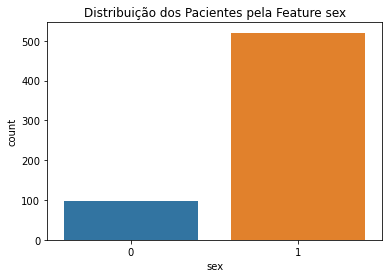

In [51]:
# analisando a distribuição dos pacientes pela feature sexo com countplot
countplot(df_data, "sex")

In [52]:
# verificando a quantidade da feature sex
df_data["sex"].value_counts()

1    520
0     97
Name: sex, dtype: int64

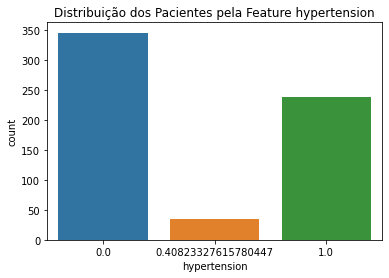

In [53]:
# analisando a distribuição dos pacientes pela feature hypertension com countplot
countplot(df_data, "hypertension")

In [54]:
# verificando a quantidade da feature hypertension
df_data["hypertension"].value_counts()

0.000000    345
1.000000    238
0.408233     34
Name: hypertension, dtype: int64

### Observações
- Observamos 14 features diferentes. (target, cholesterol, peak exercise bp 1, peak exercise bp 2, dummy 1, resting bp, xhypo, pain location, relieved after rest, resting bp s, oldpeak, age, sex, hypertension).
- A feature target é dividida em 5 valores:
    - 0 == 247 (40 %)
    - 1 == 141 (23 %)
    - 3 == 100 (16 %)
    - 2 ==  99 (16 %)
    - 4 ==  30 (05 %)
- A maior quantidade da feature cholesterol é o valor de 0.000000 e depois vem em segundo o valor de 174.579216.
- A maior quantidade da feature peak exercise bp 1 é o valor 180.000000.
- A maior quantidade da feature peak exercise bp 2 é o valor 90.000000.
- A maior quantidade da feature dummy 1 é o valor 120.000000.
- A maior quantidade da feature resting bp d é o valor 80.000000.
- A feature xhypo é dividida em 3 valores:
    - 0.000000 == 543 (88 %)
    - 0.028623 ==  58 (09 %)
    - 1.000000 == 16  (03 %)
- A feature pain location é dividida em 2 valores:
    - 0 == 568 (92 %)
    - 1 ==  49 (08 %)
- A feature relieved after rest é dividida em 3 valores:
    - 0.000000 == 412 (67 %)
    - 0.672104 == 201 (33 %)
    - 1.000000 ==   4 (00 %)
- A maior quantidade da feature resting bp s é o valor 120.000000.
- A maior quantidade da feature oldpeak é o valor 0.000000 e o segundo maior é o valor 1.000000.
- A maioria dos pacientes são da faixa etária de 50 a 60 anos.
- Temos mais pessoas do sexo 1 do que do sexo 2:
    -  97 sexo 0 (16 %)
    - 520 sexo 1 (84 %)
- A feature Hypertensions é dividida em 3 valores:
    - 0.000000 == 345 (56 %)
    - 0.408233 == 238 (39 %)
    - 1.000000 ==  34 (05 %)

## Preparando o Dataset

In [55]:
# transforma o dataframe em array para facilitar a escolha dos dados a serem utilizados
df_data_to_array = np.array(df_data)

In [56]:
# criando o vetor de saída (target)
target = df_data_to_array[:, 55]

# transformando a saída em int
target = target.astype("int")

# mostrando o vetor de sáida (target)
target  # target[target>0] = 1 (target maior que 0 é considerado 1)
# 0 para o coração saudável e 1 para problema detectado

array([0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 0, 3, 0, 3, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 1, 2, 4, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 0, 0,
       0, 0, 3, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 3, 3, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 4, 0, 2, 1, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1,
       3, 3, 0, 1, 0, 0, 2, 1, 4, 4, 4, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 4, 2, 0, 3, 0, 3, 4, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 4,
       4, 3, 0, 0, 0, 1, 0, 3, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0,
       0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 2, 0,
       2, 3, 0, 1, 0, 2, 2, 2, 3, 4, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2,
       3, 1, 0, 3, 0, 2, 0, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 4, 2,

In [57]:
# dados coletados pelos sensores
df_data_sensor = np.column_stack((
    df_data_to_array[:, 10],  # pressão sanguínea em repouso
    df_data_to_array[:, 32],  # frequência máxima atingida
    df_data_to_array[:, 33],  # frequência cardíaca em repouso
    df_data_to_array[:, 34],  # pico de pressão sanguínea durante exercício
    df_data_to_array[:, 35],  # pico de pressão sanguínea durante exercício
    df_data_to_array[:, 37]   # pressão sanguínea de repouso
))

In [58]:
# dataset com os dados médicos do paciente
df_data_medico = np.column_stack((
    df_data_to_array[:, 4],   # localização da dor
    df_data_to_array[:, 6],   # alivio após o cansaço
    df_data_to_array[:, 8],   # tipo de dor
    df_data_to_array[:, 38],  # angina induzida pelo exercício (1 = sim; 0 = nao)
    df_data.age,              # idade
    df_data.sex,              # sexo
    df_data.hypertension      # hipertensão
))

In [59]:
# concatena as duas bases de dados
df_data_paciente = np.concatenate((df_data_medico, df_data_sensor), axis=1)

# mostrando a base de dados paciente
df_data_paciente

array([[1, 0.0, 140.0, ..., 140.0, 86.0, 0.0],
       [1, 0.0, 160.0, ..., 160.0, 90.0, 0.0],
       [1, 0.0, 130.0, ..., 130.0, 80.0, 0.0],
       ...,
       [1, 1.0, 122.0, ..., 122.0, 70.0, 0.0],
       [1, 1.0, 132.37275985663084, ..., 132.37275985663084,
        82.80465949820788, 0.028622540250447227],
       [1, 0.0, 120.0, ..., 120.0, 80.0, 0.0]], dtype=object)

In [60]:
# mostrando a dimensão da base de dados
df_data_paciente.shape

(617, 13)

In [61]:
# separando os dados em treino e test
X_train, X_test, y_train, y_test = train_test_split(df_data_paciente, target, random_state=233)

In [62]:
# mostrando a dimensão de X_train e y_train
print(X_train.shape, y_train.shape)

(462, 13) (462,)


In [63]:
# mostrando a dimensão de X_test e y_test
print(X_test.shape, y_test.shape)

(155, 13) (155,)


### Observações
- Criamos um novo dataset, onde transformamos o dataset atual em array para facilitar a escolha dos dados a serem utilizados.
- Criamos o vetor de saída contendo a feature "target".
- Transformamos a saída em int.
- Mostramos o vetor de saída (target).
- Separamos os dados coletados pelos sensores (cholesterol, peak exercise bp 1, peak exercise bp 2, dummy 1, resting bp d, xhypo).
- Separamos os dados coletados pelo médico (pain location, relieved after rest, resting bp s, oldpeak, age, sex, hypertension).
- Concatenamos as duas bases de dados e uma nova variavel.
- Mostramos a nova base de dados concatenada.
- Mostramos a dimensão da base de dados:
    - 617 registro e 13 features (617, 13).
- Separamos os dados em treino e teste (25 % para teste)
- Mostramos a dimensão dos dados de treino:
    - X_train: 462 registros e 13 features (462, 13)
    - y_train: 462 registros (462, )
- Mostramos a dimensão dos dados de teste:
    - X_test: 155 registros e 13 features (155, 13)
    - y_test: 155 registros (155, )

## Aplicando o Modelo de Classificação SVM

In [64]:
# criando o modelo do classificador
svm_clf = SVC(kernel="linear")  # escolha do kernel polinomial

# treinando o modelo
svm_clf.fit(X_train, y_train)

# realizando a previsão
y_pred = svm_clf.predict(X_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
# mostrando a matriz de confusão
svm_matr_conf = confusion_matrix(y_test, y_pred)
print(svm_matr_conf)

[[52  9  1  2  0]
 [ 6 16  0  4  0]
 [ 6 11  2  7  0]
 [ 9  9  4  9  0]
 [ 3  3  0  2  0]]


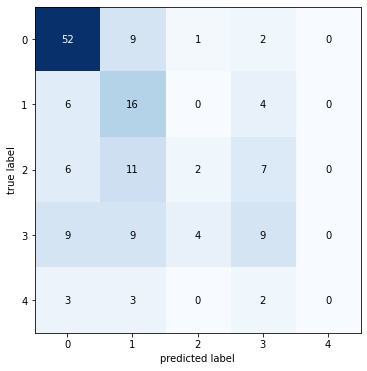

In [66]:
# plotando a matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat=svm_matr_conf, figsize=(6, 6))
plt.show()

In [67]:
# mostrando o relatório do classificador
svm_class_report = classification_report(y_test, y_pred)
print(svm_class_report)

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        64
           1       0.33      0.62      0.43        26
           2       0.29      0.08      0.12        26
           3       0.38      0.29      0.33        31
           4       0.00      0.00      0.00         8

    accuracy                           0.51       155
   macro avg       0.34      0.36      0.32       155
weighted avg       0.46      0.51      0.47       155



In [68]:
# criando a acuracia do modelo
svm_acuracia = accuracy_score(y_test, y_pred)

# mostrando a acurácia
print("Acurácia:     {0}".format(svm_acuracia))

# mostrando a acurácia em porcentagem
print("Porcentagem: {0} %".format(round(svm_acuracia * 100)))

Acurácia:     0.5096774193548387
Porcentagem: 51.0 %


### Observações
- Criamos o modelo do classificador SVM.
- Treinamos o modelo.
- Realizamos a previsão.
- Mostramos a matriz de confusão.
- Plotamos a matriz de confusão.
- Mostramos o relatório do classificador.
- Criamos e mostramos a acurácia e a acurácia em porcentagem.
    - Acurácia:     0.5096774193548387
    - Porcentagem: 51.0 %

## Modificando o Dataset

In [69]:
# transforma o dataframe em array para facilitar a escolha dos dados a serem utilizados
df_data_to_array = np.array(df_data)

In [70]:
# criando o vetor de saída (target)
label = df_data_to_array[:, 55]

# transformando a saída em int
label = target.astype("int")

label[label > 0] = 1  # target[target>0] = 1 (target maior que 0 é considerado 1)

# mostrando o vetor de sáida (target)
label  # 0 para o coração saudável e 1 para problema detectado

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [71]:
# separando os dados em treino e teste
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_data_paciente, label, random_state=233)

### Observações
- Nosso modelo não teve uma acurácia tão boa, pois os dados de saída (target) tem 5 valores distintos para fazer a previsão atrapalhando a acurácia do nosso modelo.
- Modificamos o dataset novamente, transformando todos os valores acima de 0 como 1, ou seja, os valores (2, 3, 4) serão iguais a 1.
    - Transformamos o dataframe em array para facilitar a escolha dos dados a serem utilizados.
    - Criamos o vetor de saída (label).
    - Transformamos a saída em int
    - Transformamos todos os valores acima de 0 como 1.
    - Mostramos o vetor de saída (label).
    - Separamos os dados em treino e teste (25 % teste).

## Aplicando o Modelo de Classificação SVM Novamente

In [72]:
# criando o modelo do classificador
svm_clf2 = SVC(kernel="linear")  # escolha do kernel polinomial

# treinando o modelo
svm_clf2.fit(X_train2, y_train2)

# realizando a previsão
y_pred2 = svm_clf2.predict(X_test2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
# mostrando a matriz de confusão
svm_matr_conf2 = confusion_matrix(y_test2, y_pred2)
print(svm_matr_conf2)

[[43 21]
 [12 79]]


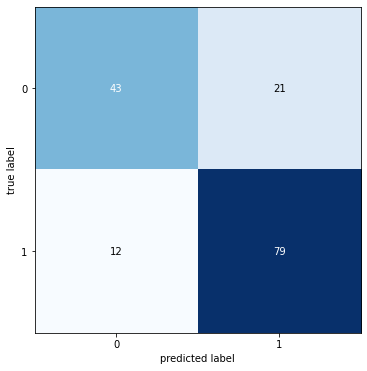

In [75]:
# plotando a matriz de confusão
fig, ax = plot_confusion_matrix(conf_mat=svm_matr_conf2, figsize=(6, 6))
plt.show()

In [76]:
# mostrando o relatório do classificador
svm_class_report2 = classification_report(y_test2, y_pred2)
print(svm_class_report2)

              precision    recall  f1-score   support

           0       0.78      0.67      0.72        64
           1       0.79      0.87      0.83        91

    accuracy                           0.79       155
   macro avg       0.79      0.77      0.77       155
weighted avg       0.79      0.79      0.78       155



In [77]:
# criando a acurácia
svm_acuracia2 = accuracy_score(y_test2, y_pred2)

# mostrando a acurácia
print("Acurácia:     {0}".format(svm_acuracia2))

# mostrando a acurácia em porcentagem
print("Porcentagem: {0}".format(round(svm_acuracia2 * 100)))

Acurácia:     0.7870967741935484
Porcentagem: 79.0


### Observações
- Criamos o modelo do classificador SVM.
- Treinamos o modelo.
- Realizamos a previsão.
- Mostramos a matriz de confusão.
- Plotamos a matriz de confusão.
- Mostramos o relatório do classificador.
- Criamos e mostramos a acurácia e a acurácia em porcentagem.
    - Acurácia:     0.7870967741935484
    - Porcentagem: 79.0 %

## Comparando os Modelos

In [78]:
# comparando as acuracias:
print("-" * 52)
print("Modelo:         SVM 5 Saídas    x    SVM 2 Saídas")
print("-" * 52)
print("Acurácia:    {0} x {1}".format(svm_acuracia, svm_acuracia2))
print("Porcentagem:       {0} %       x       {1} %".format(round(svm_acuracia*100), round(svm_acuracia2*100)))
print("-" * 52)

----------------------------------------------------
Modelo:         SVM 5 Saídas    x    SVM 2 Saídas
----------------------------------------------------
Acurácia:    0.5096774193548387 x 0.7870967741935484
Porcentagem:       51.0 %       x       79.0 %
----------------------------------------------------


Text(0.5, 1.0, 'SVM 5 SAÍDAS')

[Text(114.0, 0.5, 'Valor Real'), Text(0.5, 24.0, 'Previsão')]

Text(0.5, 1.0, 'SVM 2 SAÍDAS')

[Text(570.5454545454544, 0.5, 'Valor Real'), Text(0.5, 24.0, 'Previsão')]

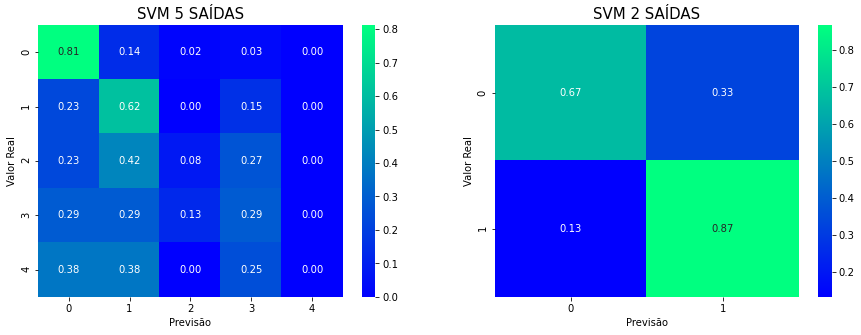

In [78]:
# criando a porcentagem de acertos

# svm 5 saídas
cm5 = svm_matr_conf
cm5 = cm5.astype("float") / cm5.sum(axis=1)[:, np.newaxis]

# svm 2 saídas
cm2 = svm_matr_conf2
cm2 = cm2.astype("float") / cm2.sum(axis=1)[:, np.newaxis]

# definindo as classes
classe5 = list(range(5))
classe2 = list(range(2))

# plotando os gráficos de heatmap

# definindo os subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# svm 5 saídas
ax[0].set_title("SVM 5 SAÍDAS", fontsize=15.)
sns.heatmap(pd.DataFrame(cm5, index=classe5, columns=classe5), cmap="winter", annot=True,
           fmt=".2f", ax=ax[0]).set(xlabel="Previsão", ylabel="Valor Real")

# svm 2 saídas
ax[1].set_title("SVM 2 SAÍDAS", fontsize=15.)
sns.heatmap(pd.DataFrame(cm2, index=classe2, columns=classe2), cmap="winter", annot=True,
           fmt=".2f", ax=ax[1]).set(xlabel="Previsão", ylabel="Valor Real")

### Observações
- Comparamos os dois modelos plotando as duas matriz de confusão.
- Neste projeto foi escolhido a métrica de avaliação acurácia.
- Mostramos a acurácia e a porcentagem da acurácia dos dois modelos:
    - SVM 5 Saídas - 0.5096774193548387 - 51.0 %
    - SVM 2 Saídas - 0.7870967741935484 - 79.0 %
- O modelo com 2 saídas tem a melhor acurácia, pois fazer a predição de apenas 2 valores é melhor do que com 5 saídas.
- Muita das vezes precisamos modificar nossos dados para melhor aproveitamento do modelo.